# Исследование рекламных расходов Яндекс.Афиши

## Общие положения

**Заказчик** — отдел маркетинговой аналитики Яндекс.Афиши

**Цель исследования** - определить возможности снижения расходов за счет отказа от неэффективных источников трафика и перераспределения бюджета

**Исходные данные** — данные Яндекс.Афиши с июня 2017 по конец мая 2018 года.

**Дополнительные вопросы, которые интересуют заказчика:**

1. **как клиенты пользуются сервисом?**
    1. сколько раз за день пользователи в среднем заходят на сайт?
    2. сколько времени пользователи проводят на сайте?
2. **когда делают первые покупки на сайте?**
    1. сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки?
2. **Сколько раз покупают за период?**
2. **сколько денег приносит компании каждый клиент?**
    1. Средний чек и LTV?
3. **когда расходы на привлечение клиента окупаются?**
    1. Как меняется LTV на покупателя по когортам?
    2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика
    3. Рассчитайте ROMI по когортам в разрезе источников



**Основные шаги:**

- Загрузка и изучение данных
- Предобработка данных
- Расчет и визуализация продуктовых метрик
- Расчет и визуализация метрик электронной коммерции
- Расчет и визуализация маркетинговых метрик
- Формулировка выводов и рекомендаций


### Описание данных

Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

**Структура visits_log.csv**
- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

**Структура orders_log.csv**
- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

**Структура costs.csv**
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что описал проект и данные и сформулировал цель проекта.
</div>

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#чтение файлов
try:
    df_visits = pd.read_csv('/datasets/visits_log.csv')
except:
    df_visits = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/visits_log.csv')
display(df_visits.head())

try:
    df_orders = pd.read_csv('/datasets/orders_log.csv')
except:
    df_orders = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/orders_log.csv')
display(df_orders.head())

try:
    df_costs = pd.read_csv('/datasets/costs.csv')
except:
    df_costs = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/costs.csv')
display(df_costs.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [3]:
#перевод названий столбцов в нижний регистр
df_visits.columns = df_visits.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()
df_costs.columns = df_costs.columns.str.lower()
#изучение данных - проверка пропусков и типов данных
display(df_visits.info())
display(df_orders.info())
display(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null object
source id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

#### Комментарий
- Даты в некорректном формате object, а dt лучше перевести наоборот в object, т.к. это не число, а ID
- Пропуски отсутствуют

In [4]:
def unique_function(data):
    for col in data:
        print('Уникальные значения:', col)
        display(data[col].value_counts())

print('База визитов')
unique_function(df_visits)
print()
print('База заказов')
unique_function(df_orders)
print()
print('База расходов')
unique_function(df_costs)

#проверка дубликатов
print('Дубликаты визитов:', df_visits.duplicated().sum())
print('Дубликаты заказов:', df_orders.duplicated().sum())
print('Дубликаты расходов:', df_costs.duplicated().sum())

База визитов
Уникальные значения: device


desktop    262567
touch       96833
Name: device, dtype: int64

Уникальные значения: end ts


2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:40:00    14
                       ..
2017-07-12 10:38:00     1
2017-10-18 18:32:00     1
2018-05-29 19:34:00     1
2018-02-01 10:57:00     1
2017-12-11 19:33:00     1
Name: end ts, Length: 224760, dtype: int64

Уникальные значения: source id


4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source id, dtype: int64

Уникальные значения: start ts


2017-11-24 16:06:00    19
2017-11-24 17:21:00    15
2018-05-31 10:01:00    15
2017-11-24 17:19:00    15
2017-11-24 15:57:00    14
                       ..
2017-08-30 21:27:00     1
2017-09-07 09:17:00     1
2018-02-09 21:33:00     1
2018-03-12 19:05:00     1
2017-10-21 23:51:00     1
Name: start ts, Length: 224303, dtype: int64

Уникальные значения: uid


12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: uid, Length: 228169, dtype: int64


База заказов
Уникальные значения: buy ts


2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2017-11-24 17:36:00    7
2018-05-31 10:02:00    7
2018-05-31 10:27:00    7
                      ..
2018-01-04 13:37:00    1
2017-07-11 13:21:00    1
2018-05-24 04:50:00    1
2017-08-17 18:50:00    1
2017-12-25 17:43:00    1
Name: buy ts, Length: 45991, dtype: int64

Уникальные значения: revenue


1.83       2552
2.44       2464
3.67       2421
1.22       2216
3.05       2041
           ... 
7.56          1
7.55          1
1236.28       1
14.27         1
107.55        1
Name: revenue, Length: 1149, dtype: int64

Уникальные значения: uid


3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: uid, Length: 36523, dtype: int64


База расходов
Уникальные значения: source_id


5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Уникальные значения: dt


2017-07-07    7
2017-11-03    7
2017-06-02    7
2018-04-29    7
2018-04-10    7
             ..
2017-08-27    7
2018-02-24    7
2017-11-13    7
2017-12-10    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64

Уникальные значения: costs


16.25     3
50.77     3
12.87     3
6.35      3
16.81     3
         ..
193.39    1
13.68     1
91.65     1
45.10     1
62.25     1
Name: costs, Length: 2396, dtype: int64

Дубликаты визитов: 0
Дубликаты заказов: 0
Дубликаты расходов: 0


#### Комментарий
- Доля планшетов в выборке визитов составляет 27%, а компьютеров 63%
- Дубликаты отсутствуют

### Вывод
- Пропусков в данных нет
- Дубликатов нет
- Необходимо изменить тип данных для столбцов с датами

## Предобработка данных

In [5]:
# замена типов данных у дат в базе визитов
df_visits['end ts'] = pd.to_datetime(df_visits['end ts'], format='%Y-%m-%d %H:%M:%S') 
df_visits['start ts'] = pd.to_datetime(df_visits['start ts'], format='%Y-%m-%d %H:%M:%S')
# замена типов данных у дат в базе заказов
df_orders['buy ts'] = pd.to_datetime(df_orders['buy ts'], format='%Y-%m-%d %H:%M:%S')
# замена типов данных у дат в базе расходов
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format='%Y-%m-%d')

#проверка
display(df_visits.info())
display(df_orders.info())
display(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null datetime64[ns]
source id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

### Вывод
У столбцов дат тип данных преобразован в корректный формат

## Расчет и визуализация продуктовых метрик

In [6]:
#выведем отдельно годы, недели, месяцы и даты начала сессии в отдельные столбцы
df_visits['session_year'] = df_visits['start ts'].astype('datetime64[Y]')
df_visits['session_month'] = df_visits['start ts'].astype('datetime64[M]')
df_visits['session_week'] = df_visits['start ts'].dt.week
df_visits['session_date'] = df_visits['start ts'].dt.date
# расчет DAU, WAU, MAU - метрик пользовательской активности по визитам
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'})
dau_total = dau_total.reset_index()
# расчет WAU, MAU и добавление индексов - номера недель в периоде могут повторяться в разных годах, а индексы будут уникальные по году и неделе/месяцу 
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_total = wau_total.reset_index()
wau_total = wau_total.rename_axis('index').reset_index()
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_total = mau_total.reset_index()
mau_total = mau_total.rename_axis('index').reset_index()

dau_average = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_average = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_average = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Среднее кол-во активных пользователей в день:', int(dau_average))
print('Среднее кол-во активных пользователей в неделю:', int(wau_average))
print('Среднее кол-во активных пользователей в месяц:', int(mau_average))

Среднее кол-во активных пользователей в день: 907
Среднее кол-во активных пользователей в неделю: 5716
Среднее кол-во активных пользователей в месяц: 23228


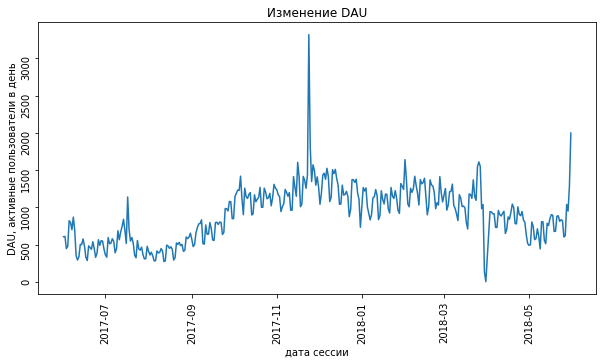

In [7]:
# графики изменения метрик DAU во времени
fig, ax = plt.subplots()
ax.plot(dau_total['session_date'], dau_total['uid'])
fig.set_size_inches(10, 5)
ax.set_xlabel('дата сессии')
ax.set_ylabel('DAU, активные пользователи в день')
ax.tick_params(labelrotation = 90, labelsize = 10)
ax.set(title='Изменение DAU')
plt.show()

#### Комментарий
На графике DAU видны три аномальных скачка дневной активности - в конце ноября, конце марта и июне. Необходимо изучить их подробнее. 

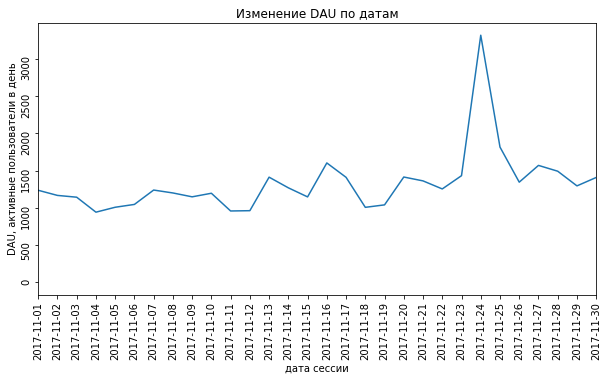

In [8]:
#изучение аномального скачка в ноябре
fig, ax = plt.subplots()
ax.plot(dau_total['session_date'], dau_total['uid'])
fig.set_size_inches(10, 5)
ax.set_xlabel('дата сессии')
ax.set_ylabel('DAU, активные пользователи в день')
ax.tick_params(labelrotation = 90, labelsize = 10)
ax.set(title='Изменение DAU по датам')
ax.set_xticks(np.arange(min(dau_total['session_date']), max(dau_total['session_date'])))
ax.set_xlim('2017-11-01', '2017-11-30')
plt.show()

График сделан на отрезке данных ноября 2017 года,  видна точная дата аномального всплеска пользовательской активности - 27.11. </div>

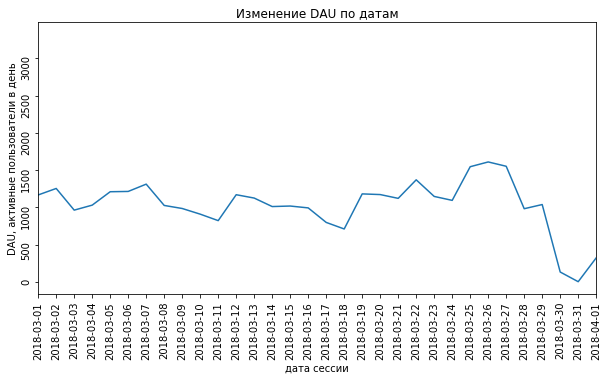

In [9]:
#изучение аномального падения в марте
fig, ax = plt.subplots()
ax.plot(dau_total['session_date'], dau_total['uid'])
fig.set_size_inches(10, 5)
ax.set_xlabel('дата сессии')
ax.set_ylabel('DAU, активные пользователи в день')
ax.tick_params(labelrotation = 90, labelsize = 10)
ax.set(title='Изменение DAU по датам')
ax.set_xticks(np.arange(min(dau_total['session_date']), max(dau_total['session_date'])))
ax.set_xlim('2018-03-01', '2018-04-01')
plt.show()

График сделан на отрезке данных марта 2018 года,  видна точная дата аномального снижения пользовательской активности - 31.03. </div>

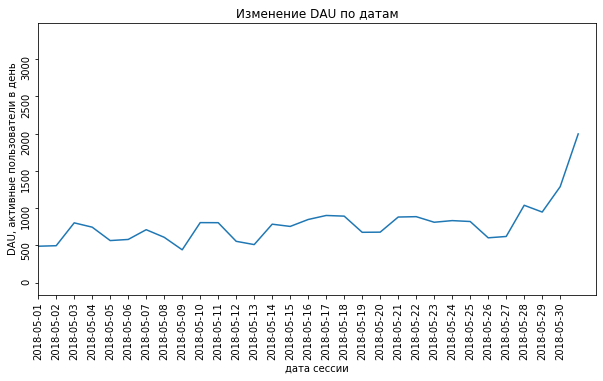

In [10]:
#изучение аномального всплеска в июне
fig, ax = plt.subplots()
ax.plot(dau_total['session_date'], dau_total['uid'])
fig.set_size_inches(10, 5)
ax.set_xlabel('дата сессии')
ax.set_ylabel('DAU, активные пользователи в день')
ax.tick_params(labelrotation = 90, labelsize = 10)
ax.set(title='Изменение DAU по датам')
ax.set_xticks(np.arange(min(dau_total['session_date']), max(dau_total['session_date'])))
ax.set_xlim('2018-05-01', '2018-06-01')
plt.show()

График сделан на отрезке данных мая 2018 года,  видна точная дата аномального всплеска пользовательской активности - 31.05. </div>

In [11]:
#изучение аномального скачка в ноябре
dau_total['session_date'] = pd.to_datetime(dau_total['session_date'], format='%Y-%m-%d')
display(dau_total[dau_total['session_date'] == '2017-11-24'])
display(dau_total[dau_total['session_date'] == '2018-05-31'])

,session_date,uid
176,2017-11-24,3319


,session_date,uid
363,2018-05-31,1997


#### Комментарий
- 2017-11-24 произошел всплеск дневной активности. Она превысила средние показатели почти в 4 раза (3319 vs 907)
- 2018-03-31 активность упала до нуля, вероятно сервис не был доступен
- 2018-05-31 произошел всплеск дневной активности. Она превысила средние показатели примерно в 2 раза (1997 vs 907)

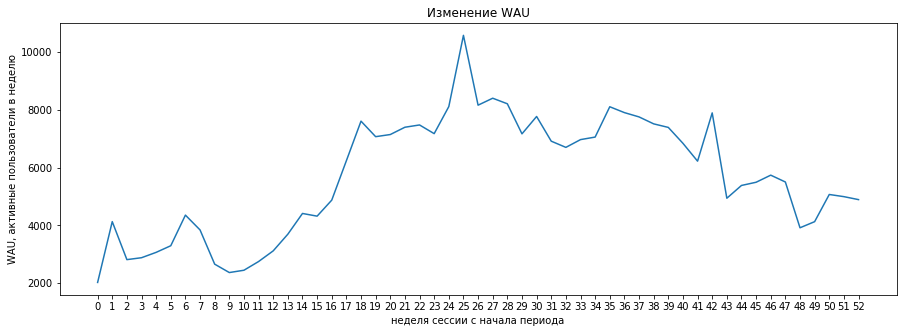

In [12]:
# графики изменения метрик WAU во времени
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 5)
ax1.plot(wau_total['index'], wau_total['uid'])
ax1.set_xlabel('неделя сессии с начала периода')
ax1.set_ylabel('WAU, активные пользователи в неделю')
ax1.set(title='Изменение WAU')
ax1.set_xticks(np.arange(min(wau_total['index']), max(wau_total['index'])+1))
plt.show()

На графике виден рост пользовательской активности с 9 по 25 неделю наблюдений, затем рост сменился снижением. </div>

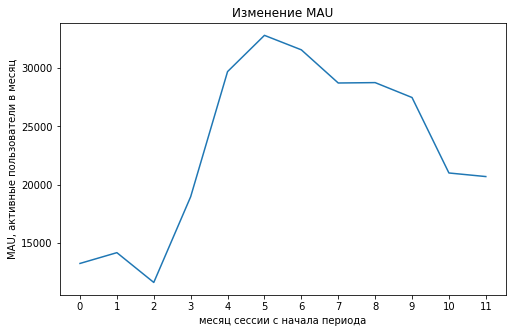

,index,session_year,session_month,uid
0,0,2017-01-01,2017-06-01,13259
1,1,2017-01-01,2017-07-01,14183
2,2,2017-01-01,2017-08-01,11631
3,3,2017-01-01,2017-09-01,18975
4,4,2017-01-01,2017-10-01,29692
5,5,2017-01-01,2017-11-01,32797
6,6,2017-01-01,2017-12-01,31557
7,7,2018-01-01,2018-01-01,28716
8,8,2018-01-01,2018-02-01,28749
9,9,2018-01-01,2018-03-01,27473


In [13]:
# графики изменения метрик MAU во времени
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)
ax1.plot(mau_total['index'], mau_total['uid'])
ax1.set_xlabel('месяц сессии с начала периода')
ax1.set_ylabel('MAU, активные пользователи в месяц')
ax1.set(title='Изменение MAU')
ax1.set_xticks(np.arange(min(mau_total['index']), max(mau_total['index'])+1))
plt.show()
display(mau_total)

###### Комментарий
Пик активности наблюдался в ноябре 2017 (6ой месяц наблюдений), меньше всего пользователей было в августе 2017 (3ий месяц наблюдений)

### Вывод

1. Обнаружены три аномальных изменения дневной активности пользователей - скачки в ноябре 2017 и мае 2018, и падение в марте 2018
    
2. Недельная активность растет до 25 недели наблюдений, затем начинает снижаться
    
3. Месячная активность минимальна в августе 2017 и максимальна в ноябре 2017
</div>

### Частота входа на сайт среднего пользователя

In [14]:
#расчет общего среднего показателя за период
sessions_users = df_visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
sessions_users.columns = ['n_sessions', 'n_users']
avr_sessions_user_period = sessions_users['n_sessions'].sum() / sessions_users['n_users'].sum()

#расчет средних показателей по датам
sessions_users ['sessions_per_user'] = (sessions_users['n_sessions'] / sessions_users['n_users'])
sessions_users = sessions_users.reset_index()
sessions_users['session_date'] = pd.to_datetime(sessions_users['session_date'], format='%Y-%m-%d')

print('Среднее кол-во сессий на пользователя в день за период:', avr_sessions_user_period)
print(sessions_users[sessions_users['session_date'] == '2017-11-24'])

Среднее кол-во сессий на пользователя в день за период: 1.0874136559064957
    session_date  n_sessions  n_users  sessions_per_user
176   2017-11-24        4042     3319           1.217837


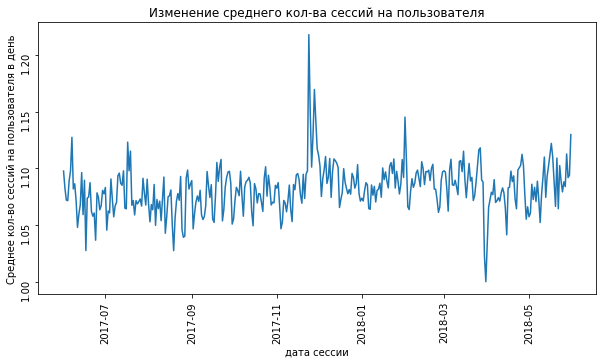

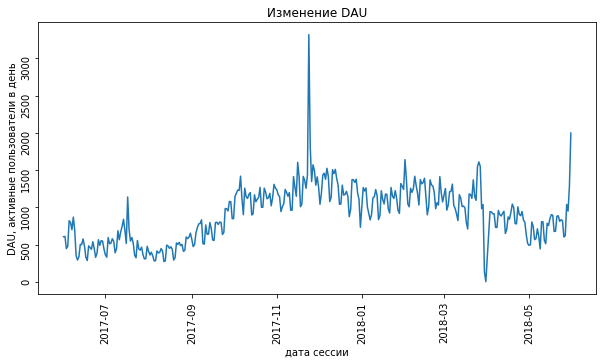

In [15]:
# графики изменения среднего кол-ва сессий на пользователя по датам
fig, ax2 = plt.subplots()
ax2.plot(sessions_users['session_date'], sessions_users['sessions_per_user'])
fig.set_size_inches(10, 5)
ax2.set_xlabel('дата сессии')
ax2.set_ylabel('Среднее кол-во сессий на пользователя в день')
ax2.tick_params(labelrotation = 90, labelsize = 10)
ax2.set(title='Изменение среднего кол-ва сессий на пользователя')
plt.show()

fig, ax = plt.subplots()
ax.plot(dau_total['session_date'], dau_total['uid'])
fig.set_size_inches(10, 5)
ax.set_xlabel('дата сессии')
ax.set_ylabel('DAU, активные пользователи в день')
ax.tick_params(labelrotation = 90, labelsize = 10)
ax.set(title='Изменение DAU')
plt.show()

#### Комментарий
- Среднее кол-во сессий на пользователя около единицы.
- Два экстремальных значения DAU также отразились на графики сессий на пользователя, если с мартовским падением до 0 все очевидно (пользователей 0 = сессий 0), то в ноябрьском пике (2017-11-27) было как больше пользователей, так среднее кол-во сессий на пользователя было больше (1,22 на дату vs 1,08 за период)

### Расчет и визуализация ASL (средней продолжительности сессии)

In [16]:
#расчет ASL в целом по выборке
df_visits['session_duration_sec'] = (df_visits['end ts'] - df_visits['start ts']).dt.seconds
print('ASL в целом по выборке:', df_visits['session_duration_sec'].mean())

ASL в целом по выборке: 643.506488592098


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

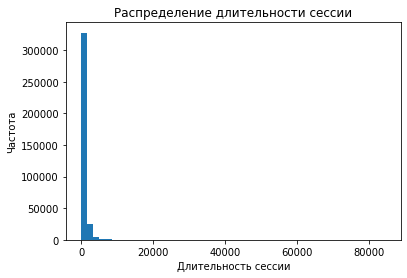

In [17]:
#визуализация распределения
fig, ax = plt.subplots()
ax.set_title('Распределение длительности сессии')
ax.set_xlabel('Длительность сессии')
ax.set_ylabel('Частота')
ax.hist(df_visits['session_duration_sec'], bins = 50)
display(df_visits['session_duration_sec'].describe())
upper_limit = (643.506489 + 3*1016.334786)

Распределение ненормальное с явно выделенным пиком около 0.</div>

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

count    353379.000000
mean        557.819542
std         674.300969
min           0.000000
25%          60.000000
50%         300.000000
75%         780.000000
max        3660.000000
Name: session_duration_sec, dtype: float64

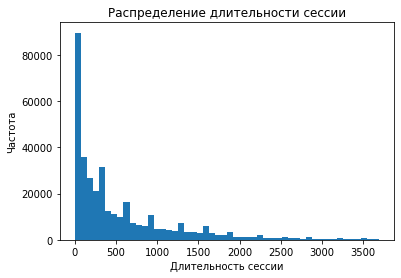

In [18]:
upper_limit = (643.506489 + 3*1016.334786)
fig, ax = plt.subplots()
ax.set_title('Распределение длительности сессии')
ax.set_xlabel('Длительность сессии')
ax.set_ylabel('Частота')
ax.hist(df_visits['session_duration_sec'], bins = 50, range = (0, upper_limit))
display(df_visits['session_duration_sec'].describe())

df_visits_limited = df_visits[df_visits['session_duration_sec'] <= upper_limit]
display(df_visits_limited['session_duration_sec'].describe())

#### Комментарий
98% значений попадает в диапазон от 0 до μ+3σ, распределение ненормальное - с сильным пиком, поэтому в качестве меры среднего уровня берем моду (наиболее частотное значение)

In [19]:
#расчет ASL по моде
print('ASL по моде:', df_visits['session_duration_sec'].mode()[0]) 

ASL по моде: 60


#### Комментарий
60 секунд может быть мало для совершения заказа. Возможно, пользователи сталкиваются с трудностями в работе сервиса.

### Расчет и визуализация Retention rate

In [20]:
#Возьмём дату, когда пользователь впервые проявил активность
df_visits['session_date'] = pd.to_datetime(df_visits['session_date'], format='%Y-%m-%d')
first_activity_date = df_visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
df_visits = df_visits.join(first_activity_date,on='uid')
df_visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,51,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,8,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,20,2018-05-20,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,52,2017-12-27,0,2017-12-27


In [21]:
#выделим отдельно месяц первой сессии и месяц сессии
df_visits['first_session_month'] = df_visits['first_activity_date'].astype('datetime64[M]')
df_visits['session_month'] = df_visits['session_date'].astype('datetime64[M]')

In [22]:
#рассчитаем lifetime пользователя в рамках когорты
df_visits['cohort_lifetime'] = (df_visits['session_month'] - df_visits['first_session_month'])
#Преобразуем разность в число месяцев, прошедших между датами.                             
df_visits['cohort_lifetime'] = (df_visits['cohort_lifetime'] / np.timedelta64(1, 'M')).round()
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].astype('int')
display(df_visits.head(10))

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,51,2017-12-20,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,8,2018-02-19,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,26,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,20,2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,52,2017-12-27,0,2017-12-27,2017-12-01,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,35,2017-09-03,60,2017-09-03,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,5,2018-01-30,3360,2017-06-29,2017-06-01,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,44,2017-11-05,60,2017-11-05,2017-11-01,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,29,2017-07-19,180,2017-07-19,2017-07-01,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,45,2017-11-08,60,2017-11-08,2017-11-01,0


In [23]:
#сгруппируем когорты
cohorts = df_visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#вычленим кол-во первоначальных пользователей в нулевом месяце
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month', 'uid']]
# переменуем uid в cohort_users
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
#объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_session_month') 
display(cohorts)

,first_session_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [24]:
#рассчитаем retention rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts_for_heatmap = cohorts
cohorts_for_heatmap['когорта'] = cohorts_for_heatmap['first_session_month'].astype('str')
#сформируем сводную таблицу
retention_pivot = cohorts_for_heatmap.pivot_table(
    index='когорта',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
когорта,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


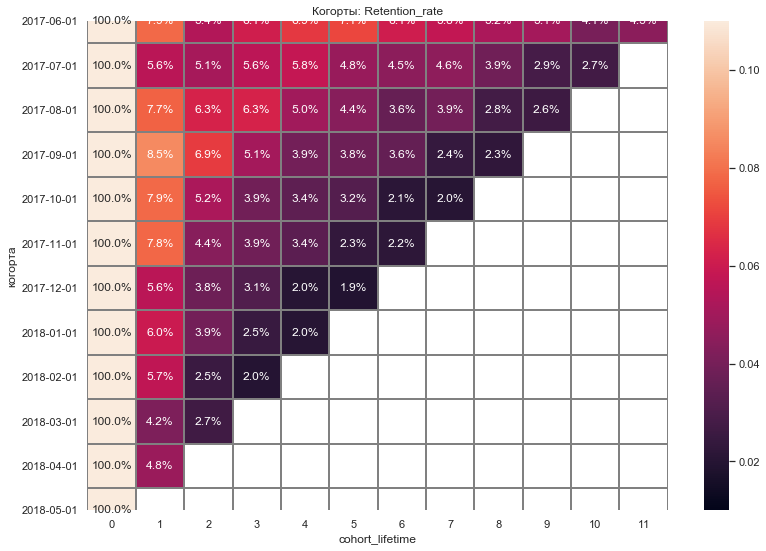

In [25]:
#построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Retention_rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0.01, vmax=0.11 );

In [26]:
# Расчет среднего Retention rate на втором месяце жизни когорт
cohorts_2dmonth = cohorts.query('cohort_lifetime == 1')
avr_RR_2dmonth = cohorts_2dmonth['uid'].sum() / cohorts_2dmonth['cohort_users'].sum()
print('Средний Retention rate на втором месяце жизни когорт:', avr_RR_2dmonth)

Средний Retention rate на втором месяце жизни когорт: 0.06489083871937472


#### Комментарий
- Retention rate  падает уже на 2 месяце когорт падают до примерно одного уровня, около 6,5%
- Среди когорт по Retention можно выделить когорты 
    - 2017-06-01 - в ней максимально долгое время поддерживается относительно высокая retention rate
    - 2017-09-01 - максимальный retention rate на втором и третьем месяце жизни


### Вывод
- Есть всплески и падения в DAU и среднем кол-ве сессий на пользователя их нужно исследовать
- ASL = 60 секунд, вероятно, мало для поиска мероприятия и покупки билета --> возможно, есть сложности в пользовании сервисом
- Retention rate падает после первого месяца. Вероятно, из-за специфики сервиса.

## Расчет и визуализация метрик электронной коммерции

### Время с визита до покупки

In [27]:
# рассчитаем дату первой покупки с группировкой по пользователям и включим ее в общую таблицу заказов по пользователям
df_orders['order_date'] = df_orders['buy ts'].dt.date
first_order_date = df_orders.groupby(['uid'])['order_date'].min()
first_order_date.name = 'first_order_date'
df_orders = df_orders.join(first_order_date,on='uid')
df_orders['first_order_date'] = pd.to_datetime(df_orders['first_order_date'], format='%Y-%m-%d')
display(df_orders.query('first_order_date != order_date').head(10))

,buy ts,revenue,uid,order_date,first_order_date
113,2017-06-02 10:18:00,2.69,9347924435714817549,2017-06-02,2017-06-01
121,2017-06-02 11:33:00,2.08,4134784971539361818,2017-06-02,2017-06-01
139,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,2017-06-01
155,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-02,2017-06-01
176,2017-06-02 17:58:00,2.69,3738863118490040629,2017-06-02,2017-06-01
227,2017-06-03 12:44:00,11.00,8741433263041703060,2017-06-03,2017-06-02
238,2017-06-03 14:26:00,1.22,1210481103526146221,2017-06-03,2017-06-02
259,2017-06-03 20:03:00,0.49,3738863118490040629,2017-06-03,2017-06-01
266,2017-06-03 21:48:00,0.76,13939592583492255989,2017-06-03,2017-06-01
284,2017-06-04 11:42:00,14.67,10116135452198588850,2017-06-04,2017-06-02


In [28]:
# объединим таблицы заказов с датами первого визита
df_orders = df_orders.join(first_activity_date,on='uid')

In [29]:
#вычислим промежуток времени между первым визитом и первым заказом
df_orders['first_visitorder_interval'] = (df_orders['first_order_date'] -df_orders['first_activity_date']) / np.timedelta64(1, 'D')
df_orders['first_visitorder_interval'] = df_orders['first_visitorder_interval'].astype('int')
display(df_orders.head())

,buy ts,revenue,uid,order_date,first_order_date,first_activity_date,first_visitorder_interval
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0


count    50415.000000
mean        17.611227
std         46.469172
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: first_visitorder_interval, dtype: float64

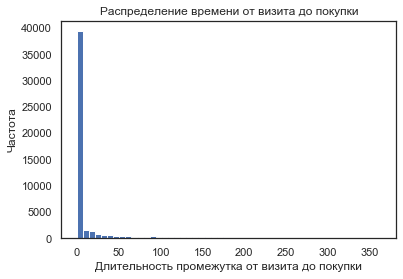

In [30]:
#визуализация распределения промежутка в днях между визитом и заказом
fig, ax = plt.subplots()
ax.set_title('Распределение времени от визита до покупки')
ax.set_xlabel('Длительность промежутка от визита до покупки')
ax.set_ylabel('Частота')
ax.hist(df_orders['first_visitorder_interval'], bins = 50)
display(df_orders['first_visitorder_interval'].describe())

Распределение ненормальное, длинный хвост с выбросами. </div>

count    50415.000000
mean        17.611227
std         46.469172
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: first_visitorder_interval, dtype: float64

count    48811.000000
mean        11.094651
std         28.669507
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        157.000000
Name: first_visitorder_interval, dtype: float64

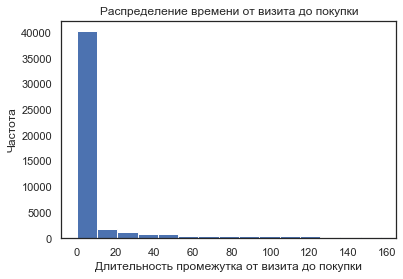

In [31]:
#устранение выбросов
upper_limit2 = 17.611227 + 3*46.469172
fig, ax = plt.subplots()
ax.set_title('Распределение времени от визита до покупки')
ax.set_xlabel('Длительность промежутка от визита до покупки')
ax.set_ylabel('Частота')
ax.hist(df_orders['first_visitorder_interval'], bins = 15, range = (0, upper_limit2))
display(df_orders['first_visitorder_interval'].describe())
df_orders_limited = df_orders[df_orders['first_visitorder_interval'] <= upper_limit2]
display(df_orders_limited['first_visitorder_interval'].describe())

In [32]:
print('Среднее кол-во дней до покупки после первого визита:', df_orders_limited['first_visitorder_interval'].mode()[0]) 

Среднее кол-во дней до покупки после первого визита: 0


#### Комментарий
- 97% наблюдений попадает в диапазон от 0 до μ+3σ, распределение ненормальное, поэтому в качестве меры среднего уровня берем моду 
- У большинства пользователей первая покупка происходит при первом визите

### Среднее кол-во покупок на клиента

In [33]:
#добавляем в таблицу заказов год и месяц заказа
df_orders['order_year'] = df_orders['order_date'].astype('datetime64[Y]')
df_orders['order_month'] = df_orders['order_date'].astype('datetime64[M]')
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], format='%Y-%m-%d')
# группируем данные по году и месяцу и рассчитываем общее кол-во заказов и кол-во уникальных покупателей
orders_per_user = df_orders.groupby(['order_year', 'order_month']).agg({'uid': ['count', 'nunique']})
orders_per_user.columns = ['n_orders', 'n_buyers']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_buyers']
orders_per_user = orders_per_user.reset_index()
orders_per_user_period = orders_per_user[orders_per_user['order_month'] < '2018-06-01']
print(orders_per_user_period)
# рассчитываем среднее кол-во заказов на клиента в месяц за 12 месяцев
avr_orders_for_period_by_months = orders_per_user_period['n_orders'].sum() / orders_per_user_period['n_buyers'].sum()
# рассчитываем среднее кол-во заказов на клиента за 12 месяцев
print('Среднее кол-во заказов на уникального клиента в месяц за период 12 мес:', avr_orders_for_period_by_months)
df_orders_limited = df_orders[df_orders['order_date'] < '2018-06-01']
print(df_orders_limited.agg({'uid': ['count', 'nunique']}))
all_orders_clients = df_orders['uid'].count() /  df_orders['uid'].nunique()
print('Среднее кол-во заказов на уникального клиента за период 12 мес:', all_orders_clients)

   order_year order_month  n_orders  n_buyers  orders_per_user
0  2017-01-01  2017-06-01      2354      2023         1.163618
1  2017-01-01  2017-07-01      2363      1984         1.191028
2  2017-01-01  2017-08-01      1807      1472         1.227582
3  2017-01-01  2017-09-01      3387      2750         1.231636
4  2017-01-01  2017-10-01      5679      4675         1.214759
5  2017-01-01  2017-11-01      5659      4547         1.244557
6  2017-01-01  2017-12-01      6218      4942         1.258195
7  2018-01-01  2018-01-01      4721      3898         1.211134
8  2018-01-01  2018-02-01      5281      4258         1.240254
9  2018-01-01  2018-03-01      5326      4181         1.273858
10 2018-01-01  2018-04-01      3273      2744         1.192784
11 2018-01-01  2018-05-01      4346      3544         1.226298
Среднее кол-во заказов на уникального клиента в месяц за период 12 мес: 1.2290701643181043
           uid
count    50414
nunique  36522
Среднее кол-во заказов на уникального клиента

#### Комментарий
- Среднее кол-во заказов на одного клиента также составляет около одного заказа
- Пик по среднему кол-ву заказов достигается в декабре

### Средний чек

In [34]:
#расчет среднего чека
revenue_per_order = df_orders.groupby(['order_year', 'order_month']).agg({'revenue': ['sum', 'count']})
revenue_per_order.columns = ['revenue_volume', 'n_orders']
revenue_per_order['revenue_per_order'] = revenue_per_order['revenue_volume'] / revenue_per_order['n_orders']
revenue_per_order = revenue_per_order.reset_index()
revenue_per_order = revenue_per_order[revenue_per_order['order_month'] < '2018-06-01']
avr_revenue_per_order =  revenue_per_order['revenue_volume'].sum() / revenue_per_order['n_orders'].sum()
print(revenue_per_order)
print('Средний чек в месяц за период 12 мес:', avr_revenue_per_order)

   order_year order_month  revenue_volume  n_orders  revenue_per_order
0  2017-01-01  2017-06-01         9557.49      2354           4.060106
1  2017-01-01  2017-07-01        12539.47      2363           5.306589
2  2017-01-01  2017-08-01         8758.78      1807           4.847139
3  2017-01-01  2017-09-01        18345.51      3387           5.416448
4  2017-01-01  2017-10-01        27987.70      5679           4.928280
5  2017-01-01  2017-11-01        27069.93      5659           4.783518
6  2017-01-01  2017-12-01        36388.60      6218           5.852139
7  2018-01-01  2018-01-01        19417.13      4721           4.112927
8  2018-01-01  2018-02-01        25560.54      5281           4.840095
9  2018-01-01  2018-03-01        28834.59      5326           5.413930
10 2018-01-01  2018-04-01        16858.06      3273           5.150645
11 2018-01-01  2018-05-01        20735.98      4346           4.771279
Средний чек в месяц за период 12 мес: 4.999678263974262


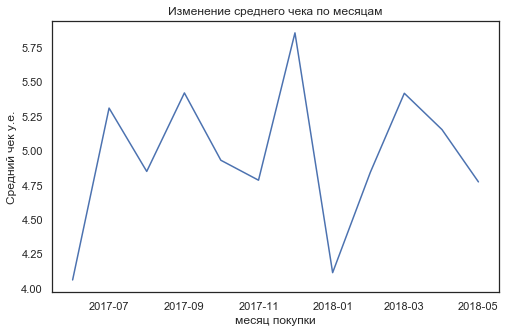

In [35]:
#визуализация среднего чека по месяцам
fig, ax3 = plt.subplots()
fig.set_size_inches(8, 5)
ax3.plot(revenue_per_order['order_month'], revenue_per_order['revenue_per_order'])
ax3.set_xlabel('месяц покупки')
ax3.set_ylabel('Средний чек у.е.')
ax3.set(title='Изменение среднего чека по месяцам')
plt.show()

#### Комментарий
- Средний чек составляет около 5 у.е. 
- Пик среднего чека пришелся на декабрь и сменился спадом в январе, вероятно, есть сезонность в праздники - как вариант праздничные покупка билетов на праздничные мероприятия в январские каникулы

### LTV

In [36]:
#получим месяц первой покупки каждого покупателя
df_orders['first_order_month'] = df_orders['first_order_date'].astype('datetime64[M]')
first_orders = df_orders.groupby('uid').agg({'first_order_month': 'min'}).reset_index()
print(first_orders.head()) 

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


In [37]:
# посчитаем кол-во новых покупателей за месяц
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [38]:
# сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа
cohorts_orders = (
    df_orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
display(cohorts_orders)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [39]:
# подтянем кол-во новых покупателей в когорте
report = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')

# рассчитаем возраст когорты
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report)

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [40]:
# рассчитаем валовое кол-во покупок по кол-ву заказов (кол-во заказов = кол-во uid)
#маржинальность = 100%, поэтому валовая прибыль = revenue, отдельно ее не рассчитываем
report['LTV'] = report['revenue'] / report['n_buyers']
display(report)
output = report.pivot_table(
    index='first_order_month', columns='age', values='LTV', aggfunc='mean'
).round(2)

output.fillna('') 

,first_order_month,n_buyers,order_month,revenue,age,LTV
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


In [41]:
# сводная с накопительным итогом LTV
output_consolidated = output.cumsum(axis=1)
display(output_consolidated)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


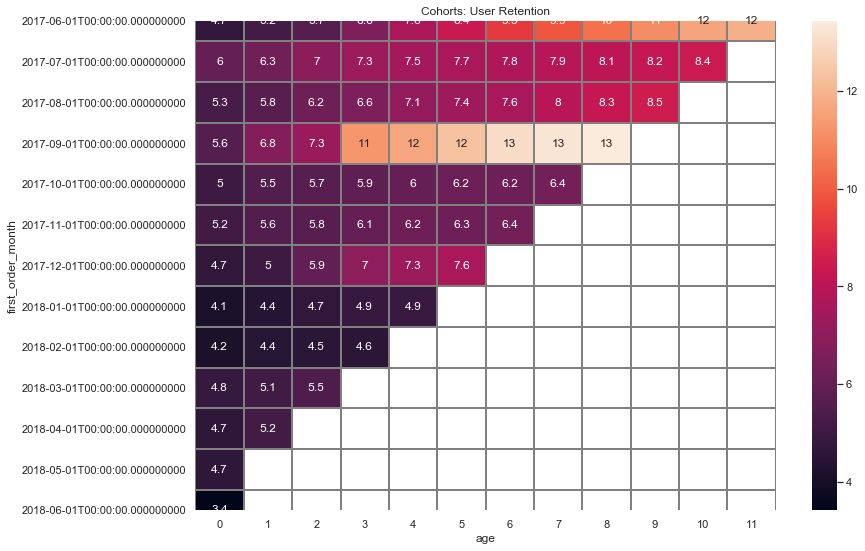

In [42]:
#построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(output_consolidated, annot=True, linewidths=1, linecolor='gray');

In [43]:
#рассчитываем среднюю когорту - усредняем LTV
output.cumsum(axis=1).mean(axis=0)

age
0      4.801538
1      5.396364
2      5.823000
3      6.690000
4      7.297500
5      7.970000
6      8.385000
7      9.084000
8     10.060000
9      9.253333
10    10.010000
11    11.880000
dtype: float64

#### Комментарий
- Средний LTV за 6 мес составил 8,4 у.е
- Из когорт можно выделить когорту 2017-09-01, чей LTV вырос на 3 месяце с 7,3 до 11 у.е. и продолжил расти достигнув максимума среди когорт

### Вывод
1. Большинство пользователей совершают покупки в день визита. Целесообразно в дальнейшем провести более детальный анализ покупателей не совершивших покупку в первый визит, чтобы определить, кто эти клиенты и есть ли у них сложности в пользовании сервисом.
2. На одного уникального клиента в месяц приходится около 1 покупки (1,22 в мес), в декабре наблюдался рост среднего показателя до 1,25 и также был пик по среднему чеку - около 6 у.е. - вероятно, ажиотаж перед праздниками
3. С точки зрения LTV, когорта 2017-09-01 продемонстрировала наибольшие значения, ее можно взять для дальнейшего анализа как best practice

## Маркетинговые метрики

### Анализ общих расходов на маркетинг

In [44]:
#выделение месяца продажи из даты
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')
print(df_costs)
print(df_costs.sum())

      source_id         dt  costs      month
0             1 2017-06-01  75.20 2017-06-01
1             1 2017-06-02  62.25 2017-06-01
2             1 2017-06-03  36.53 2017-06-01
3             1 2017-06-04  55.00 2017-06-01
4             1 2017-06-05  57.08 2017-06-01
...         ...        ...    ...        ...
2537         10 2018-05-27   9.92 2018-05-01
2538         10 2018-05-28  21.26 2018-05-01
2539         10 2018-05-29  11.32 2018-05-01
2540         10 2018-05-30  33.15 2018-05-01
2541         10 2018-05-31  17.60 2018-05-01

[2542 rows x 4 columns]
source_id     12347.00
costs        329131.62
dtype: float64


In [45]:
#группировка расходов по источнику
costs_source = df_costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().sort_values(by = 'costs', ascending = False)
costs_source['share_in_costs'] = costs_source['costs'] / costs_source['costs'].sum()
costs_source_formated = costs_source.style.format({'share_in_costs': '{:.2%}'})
display(costs_source_formated)

,source_id,costs,share_in_costs
2,3,141322,42.94%
3,4,61073.6,18.56%
4,5,51757.1,15.73%
1,2,42806,13.01%
0,1,20833.3,6.33%
6,10,5822.49,1.77%
5,9,5517.49,1.68%


#### Комментарий
Наибольшая доля расходов - ок.43% приходится на источник трафика №3

,month,costs,month_for_bar
0,2017-06-01,18015.00,6
1,2017-07-01,18240.59,7
2,2017-08-01,14790.54,8
3,2017-09-01,24368.91,9
4,2017-10-01,36322.88,10
5,2017-11-01,37907.88,11
6,2017-12-01,38315.35,12
7,2018-01-01,33518.52,1
8,2018-02-01,32723.03,2
9,2018-03-01,30415.27,3


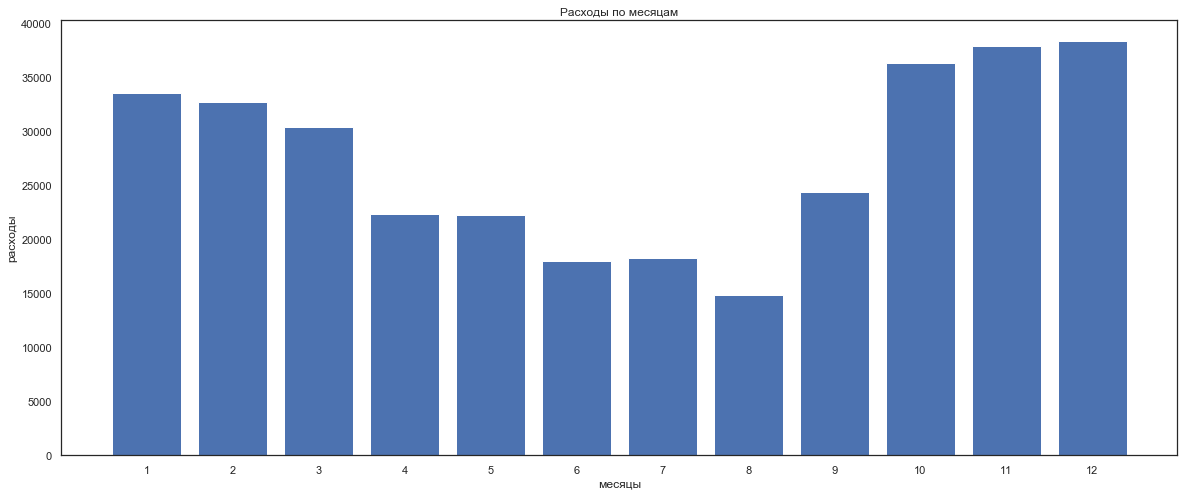

In [46]:
#группировка расходов по месяцу
costs_month = df_costs.groupby('month').agg({'costs': 'sum'}).reset_index()
costs_month['month_for_bar'] = costs_month['month'].dt.month
display(costs_month)
#диаграмма
fig, ax = plt.subplots()
ax.bar(costs_month['month_for_bar'], costs_month['costs'])
fig.set_size_inches(20, 8)
ax.set_xlabel('месяцы')
ax.set_ylabel('расходы')
ax.set(title='Расходы по месяцам')
plt.xticks([6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5])
plt.show()

#### Комментарий
Маркетинговые расходы растут с сентября по декабрь, затем начинают снижатся до мая

In [47]:
#построим сводную для графика по источникам
df_costs_pivot = df_costs.pivot_table(index='month', columns = 'source_id', values='costs', aggfunc=['sum'])
df_costs_pivot.columns = df_costs_pivot.columns.get_level_values(1)
df_costs_pivot = df_costs_pivot.reset_index()
display(df_costs_pivot)

source_id,month,1,2,3,4,5,9,10
0,2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
5,2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
6,2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
7,2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
8,2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88
9,2018-03-01,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41


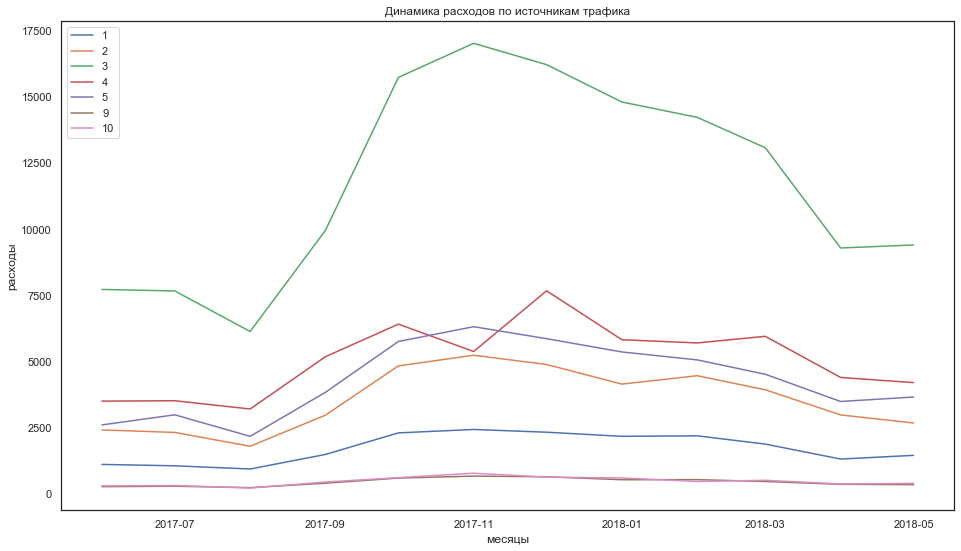

In [48]:
fig, ax= plt.subplots(1,1,figsize=(16, 9))
x= df_costs_pivot['month']
y1 = df_costs_pivot[1]
y2 = df_costs_pivot[2]
y3 = df_costs_pivot[3]
y4 = df_costs_pivot[4]
y5 = df_costs_pivot[5]
y6 = df_costs_pivot[9]
y7 = df_costs_pivot[10]
ax.plot(x, y1, label = '1')
ax.plot(x, y2, label = '2')
ax.plot(x, y3, label = '3')
ax.plot(x, y4, label = '4')
ax.plot(x, y5, label = '5')
ax.plot(x, y6, label = '9')
ax.plot(x, y7, label = '10')
ax.legend(loc='upper left')
ax.set_title('Динамика расходов по источникам трафика')
ax.set_xlabel('месяцы')
ax.set_ylabel('расходы')
plt.show()

#### Комментарий
- Источник №1: повышение в осенние месяцы 2017 и их стабилизация до весны 2018
- Для источников №2,3,5 характерно повышение расходов в осенние месяцы 2017 и затем снижение расходов,  - Источник №4 также с сентября начал расти в расходов, но в ноябре произошел резкий спад, который в декабре сменился резким ростом
- Источники №9-10 - наименьшие расходы, практически идентичная динамика

### Расчет CAC по проекту

In [49]:
#добавить к новым пользователям по месяцам общие расходы
cohort_sizes = pd.merge(
    cohort_sizes, costs_month, left_on='first_order_month', right_on='month'
)

In [50]:
# рассчитать общий CAC по проекту по месяцам
cohort_sizes['CAC'] = cohort_sizes['costs'] / cohort_sizes['n_buyers']
avr_costs_per_buyers =  cohort_sizes['costs'].sum() / cohort_sizes['n_buyers'].sum()
print('Средние расходы на нового клиента в месяц за период 12 мес:', avr_costs_per_buyers)
display(cohort_sizes)

Средние расходы на нового клиента в месяц за период 12 мес: 9.0118728437654


,first_order_month,n_buyers,month,costs,month_for_bar,CAC
0,2017-06-01,2023,2017-06-01,18015.00,6,8.905091
1,2017-07-01,1923,2017-07-01,18240.59,7,9.485486
2,2017-08-01,1370,2017-08-01,14790.54,8,10.796015
3,2017-09-01,2581,2017-09-01,24368.91,9,9.441654
4,2017-10-01,4340,2017-10-01,36322.88,10,8.369327
5,2017-11-01,4081,2017-11-01,37907.88,11,9.288870
6,2017-12-01,4383,2017-12-01,38315.35,12,8.741809
7,2018-01-01,3373,2018-01-01,33518.52,1,9.937302
8,2018-02-01,3651,2018-02-01,32723.03,2,8.962758
9,2018-03-01,3533,2018-03-01,30415.27,3,8.608907


#### Комментарий
Средний CAC по проекту составляет около 9 у.е.

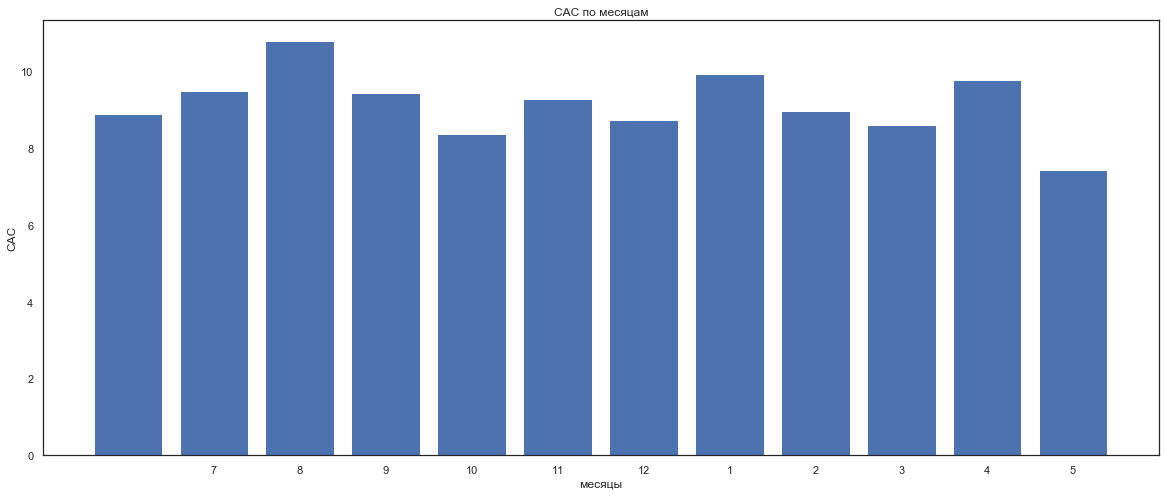

In [51]:
cohort_sizes_for_bar = cohort_sizes
cohort_sizes_for_bar['month_for_bar'] = cohort_sizes_for_bar['month_for_bar'].astype('str')
fig, ax = plt.subplots()
ax.bar(cohort_sizes['month_for_bar'], cohort_sizes['CAC'])
fig.set_size_inches(20, 8)
ax.set_xlabel('месяцы')
ax.set_ylabel('CAC')
ax.set(title='CAC по месяцам')
ax.set_xticks([6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5])
plt.show()

#### Комментарий
    
    - В целом аномальных снижений или падений CAC по месяцам не наблюдается.
    
    - Минимальный CAC выявлен в октябре 2017, а максимальный в августе 2017 
</div>

### ROMI по источникам

In [52]:
#вычленим источник из таблицы визитов на основе первого визита. Главный источник = первый.
#фильтрация только по тем линиям, где первая дата визита соответствует дате сессии
df_visits_first_source = df_visits.query('first_activity_date == session_date')
df_uid_first_source = df_visits_first_source[['uid', 'source id']]
#добавим источник в таблицу заказов
df_orders = pd.merge(df_orders, df_uid_first_source, on = 'uid')
display(df_orders)

,buy ts,revenue,uid,order_date,first_order_date,first_activity_date,first_visitorder_interval,order_year,order_month,first_order_month,source id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...,...,...,...,...
60390,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-31,0,2018-01-01,2018-05-01,2018-05-01,4
60391,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-31,0,2018-01-01,2018-05-01,2018-05-01,10
60392,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-31,0,2018-01-01,2018-05-01,2018-05-01,3
60393,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2017-10-23,220,2018-01-01,2018-05-01,2018-05-01,3


In [53]:
#кол-ва заказов и выручка по источнику
source_rev_qty = df_orders.groupby('source id').agg({'revenue': ['count', 'sum']})
#source_rev_qty.columns = source_rev_qty.columns.get_level_values(1)
source_rev_qty = source_rev_qty.reset_index()
source_rev_qty.columns = ['source_id', 'order_qty', 'revenue_sum']
source_rev_qty['share_in_revenue'] = source_rev_qty['revenue_sum'] / source_rev_qty['revenue_sum'].sum()
source_rev_qty['share_in_qty'] = source_rev_qty['order_qty'] / source_rev_qty['order_qty'].sum()
source_rev_qty =pd.merge(source_rev_qty, costs_source, on='source_id')
source_rev_qty['ROMI_simple_formula'] = source_rev_qty['revenue_sum'] / source_rev_qty['costs']
source_rev_qty = source_rev_qty.reset_index().sort_values(by = 'ROMI_simple_formula', ascending = False)
source_rev_qty = source_rev_qty.style.format({'share_in_revenue': '{:.2%}', 'share_in_qty': '{:.2%}', 'share_in_costs': '{:.2%}'})
display(source_rev_qty)

,index,source_id,order_qty,revenue_sum,share_in_revenue,share_in_qty,costs,share_in_costs,ROMI_simple_formula
0,0,1,8418,49135.6,15.58%,13.94%,20833.3,6.33%,2.35852
1,1,2,8246,71226.2,22.59%,13.65%,42806,13.01%,1.66393
4,4,5,12172,64625.1,20.49%,20.15%,51757.1,15.73%,1.24862
5,5,9,1726,6048.58,1.92%,2.86%,5517.49,1.68%,1.09626
3,3,4,13905,60760,19.27%,23.02%,61073.6,18.56%,0.994865
6,6,10,1744,5494.15,1.74%,2.89%,5822.49,1.77%,0.943608
2,2,3,14183,58056.1,18.41%,23.48%,141322,42.94%,0.410809


#### Комментарий
- Несмотря на то, что 3ий источник трафика занимает 1ое место по расходам, по доходам он не окупается и является самым неэффективным
- Кроме 3го источника неэффективность демонстрируют 4ый и 10ый источники
- Наиболее эффективный источник с точки зрения отдачи от расходов - №1, хотя на него приходится всего 6% расходов и 15% продаж.


### Расчет ROMI для общего LTV

In [54]:
report_common_CAC_LTV = pd.merge(
    report, costs_month, left_on='first_order_month', right_on='month'
)
report_common_CAC_LTV['cac'] = report_common_CAC_LTV['costs'] / report_common_CAC_LTV['n_buyers']
report_common_CAC_LTV.head() 

,first_order_month,n_buyers,order_month,revenue,age,LTV,month,costs,month_for_bar,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,18015.0,6,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06-01,18015.0,6,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06-01,18015.0,6,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06-01,18015.0,6,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06-01,18015.0,6,8.905091


In [55]:
report_common_CAC_LTV['romi'] = report_common_CAC_LTV['LTV'] / report_common_CAC_LTV['cac']
output_common_CAC_LTV = report_common_CAC_LTV.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output_common_CAC_LTV.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
output_common_CAC_LTV.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

### Расчет ROMI в разрезе источников

In [57]:
#нарезаем источники
df_filtered_source_1 = df_orders[df_orders['source id'] == 1]
df_filtered_source_2 = df_orders[df_orders['source id'] == 2]
df_filtered_source_3 = df_orders[df_orders['source id'] == 3]
df_filtered_source_4 = df_orders[df_orders['source id'] == 4]
df_filtered_source_5 = df_orders[df_orders['source id'] == 5]
df_filtered_source_9 = df_orders[df_orders['source id'] == 9]
df_filtered_source_10 = df_orders[df_orders['source id'] == 10]
display(df_filtered_source_1.head())

,buy ts,revenue,uid,order_date,first_order_date,first_activity_date,first_visitorder_interval,order_year,order_month,first_order_month,source id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,1
9,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,1
11,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,1
13,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-02,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,1
15,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-04,2017-06-01,2017-06-01,0,2017-01-01,2017-06-01,2017-06-01,1


In [58]:
#делаем группировку расходов по месяцам и костам
display(df_costs.head())
costs_source_month = df_costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
display(costs_source_month)
costs_source_month['costs'].sum()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


329131.61999999994

In [59]:
# делаем нарезку по расходам по источникам
costs_source_month1 = costs_source_month[costs_source_month['source_id'] == 1]
costs_source_month2 = costs_source_month[costs_source_month['source_id'] == 2]
costs_source_month3 = costs_source_month[costs_source_month['source_id'] == 3]
costs_source_month4 = costs_source_month[costs_source_month['source_id'] == 4]
costs_source_month5 = costs_source_month[costs_source_month['source_id'] == 5]
costs_source_month9 = costs_source_month[costs_source_month['source_id'] == 9]
costs_source_month10 = costs_source_month[costs_source_month['source_id'] == 10]

In [60]:
# посчитаем кол-во новых покупателей за месяц в разрезе источников - по первому месяцу для каждого фильтра
cohort_sizes_by_sources_1 = (df_filtered_source_1.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())
cohort_sizes_by_sources_2 = (df_filtered_source_2.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())
cohort_sizes_by_sources_3 = (df_filtered_source_3.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())
cohort_sizes_by_sources_4 = (df_filtered_source_4.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())
cohort_sizes_by_sources_5 = (df_filtered_source_5.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())
cohort_sizes_by_sources_9 = (df_filtered_source_9.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())
cohort_sizes_by_sources_10 = (df_filtered_source_10.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index())

In [61]:
# сгруппируем таблицу заказов по месяцу первой покупки, месяцу каждого заказа и расчитаем сумму дохода по каждому источнику
cohorts_orders_by_sources_1 = (df_filtered_source_1.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_orders_by_sources_2 = (df_filtered_source_2.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_orders_by_sources_3 = (df_filtered_source_3.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_orders_by_sources_4 = (df_filtered_source_4.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_orders_by_sources_5 = (df_filtered_source_5.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_orders_by_sources_9 = (df_filtered_source_9.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_orders_by_sources_10 = (df_filtered_source_10.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
display(cohorts_orders_by_sources_1)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2146.29
1,2017-06-01,2017-07-01,555.45
2,2017-06-01,2017-08-01,483.67
3,2017-06-01,2017-09-01,1019.48
4,2017-06-01,2017-10-01,938.29
...,...,...,...
73,2018-03-01,2018-04-01,784.71
74,2018-03-01,2018-05-01,536.79
75,2018-04-01,2018-04-01,1383.97
76,2018-04-01,2018-05-01,672.25


In [62]:
# подтянем кол-во новых покупателей в когорте
report_by_sources_1 = pd.merge(cohort_sizes_by_sources_1, cohorts_orders_by_sources_1, on=['first_order_month'])
report_by_sources_2 = pd.merge(cohort_sizes_by_sources_2, cohorts_orders_by_sources_2, on=['first_order_month'])
report_by_sources_3 = pd.merge(cohort_sizes_by_sources_3, cohorts_orders_by_sources_3, on=['first_order_month'])
report_by_sources_4 = pd.merge(cohort_sizes_by_sources_4, cohorts_orders_by_sources_4, on=['first_order_month'])
report_by_sources_5 = pd.merge(cohort_sizes_by_sources_5, cohorts_orders_by_sources_5, on=['first_order_month'])
report_by_sources_9 = pd.merge(cohort_sizes_by_sources_9, cohorts_orders_by_sources_9, on=['first_order_month'])
report_by_sources_10 = pd.merge(cohort_sizes_by_sources_10, cohorts_orders_by_sources_10, on=['first_order_month'])
# рассчитаем возраст когорты
report_by_sources_1['age'] = (report_by_sources_1['order_month'] - report_by_sources_1['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_1['age'] = report_by_sources_1['age'].round().astype('int')
report_by_sources_2['age'] = (report_by_sources_2['order_month'] - report_by_sources_2['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_2['age'] = report_by_sources_2['age'].round().astype('int')
report_by_sources_3['age'] = (report_by_sources_3['order_month'] - report_by_sources_3['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_3['age'] = report_by_sources_3['age'].round().astype('int')
report_by_sources_4['age'] = (report_by_sources_4['order_month'] - report_by_sources_4['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_4['age'] = report_by_sources_4['age'].round().astype('int')
report_by_sources_5['age'] = (report_by_sources_5['order_month'] - report_by_sources_5['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_5['age'] = report_by_sources_5['age'].round().astype('int')
report_by_sources_9['age'] = (report_by_sources_9['order_month'] - report_by_sources_9['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_9['age'] = report_by_sources_9['age'].round().astype('int')
report_by_sources_10['age'] = (report_by_sources_10['order_month'] - report_by_sources_10['first_order_month']) / np.timedelta64(1, 'M')
report_by_sources_10['age'] = report_by_sources_10['age'].round().astype('int')

# рассчитаем валовое кол-во покупок по кол-ву заказов (кол-во заказов = кол-во uid)
#маржинальность = 100%, поэтому валовая прибыль = revenue, отдельно ее не рассчитываем
report_by_sources_1['LTV'] = report_by_sources_1['revenue'] / report_by_sources_1['uid']
report_by_sources_2['LTV'] = report_by_sources_2['revenue'] / report_by_sources_2['uid']
report_by_sources_3['LTV'] = report_by_sources_3['revenue'] / report_by_sources_3['uid']
report_by_sources_4['LTV'] = report_by_sources_4['revenue'] / report_by_sources_4['uid']
report_by_sources_5['LTV'] = report_by_sources_5['revenue'] / report_by_sources_5['uid']
report_by_sources_5['LTV'] = report_by_sources_5['revenue'] / report_by_sources_5['uid']
report_by_sources_9['LTV'] = report_by_sources_9['revenue'] / report_by_sources_9['uid']
report_by_sources_10['LTV'] = report_by_sources_10['revenue'] / report_by_sources_10['uid']

#добавим данные о расходах по месяцам и источникам в отчёт и посчитаем CAC
report_with_cac_by_sources_1 = pd.merge(report_by_sources_1, costs_source_month1, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_1['cac'] = report_with_cac_by_sources_1['costs'] / report_with_cac_by_sources_1['uid']
report_with_cac_by_sources_1['romi'] =  report_with_cac_by_sources_1['LTV'] / report_with_cac_by_sources_1['cac']

report_with_cac_by_sources_2 = pd.merge(report_by_sources_2, costs_source_month2, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_2['cac'] = report_with_cac_by_sources_2['costs'] / report_with_cac_by_sources_2['uid']
report_with_cac_by_sources_2['romi'] =  report_with_cac_by_sources_2['LTV'] / report_with_cac_by_sources_2['cac']

report_with_cac_by_sources_3 = pd.merge(report_by_sources_3, costs_source_month3, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_3['cac'] = report_with_cac_by_sources_3['costs'] / report_with_cac_by_sources_3['uid']
report_with_cac_by_sources_3['romi'] =  report_with_cac_by_sources_3['LTV'] / report_with_cac_by_sources_3['cac']

report_with_cac_by_sources_4 = pd.merge(report_by_sources_4, costs_source_month4, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_4['cac'] = report_with_cac_by_sources_4['costs'] / report_with_cac_by_sources_4['uid']
report_with_cac_by_sources_4['romi'] =  report_with_cac_by_sources_4['LTV'] / report_with_cac_by_sources_4['cac']

report_with_cac_by_sources_5 = pd.merge(report_by_sources_5, costs_source_month5, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_5['cac'] = report_with_cac_by_sources_5['costs'] / report_with_cac_by_sources_5['uid']
report_with_cac_by_sources_5['romi'] =  report_with_cac_by_sources_5['LTV'] / report_with_cac_by_sources_5['cac']

report_with_cac_by_sources_9 = pd.merge(report_by_sources_9, costs_source_month9, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_9['cac'] = report_with_cac_by_sources_9['costs'] / report_with_cac_by_sources_9['uid']
report_with_cac_by_sources_9['romi'] =  report_with_cac_by_sources_9['LTV'] / report_with_cac_by_sources_9['cac']

report_with_cac_by_sources_10 = pd.merge(report_by_sources_10, costs_source_month10, left_on=['first_order_month'], right_on=['month'])
report_with_cac_by_sources_10['cac'] = report_with_cac_by_sources_10['costs'] / report_with_cac_by_sources_10['uid']
report_with_cac_by_sources_10['romi'] =  report_with_cac_by_sources_10['LTV'] / report_with_cac_by_sources_10['cac']

In [63]:
# просчитаем сводные по ROMI по источникам
output1 = report_with_cac_by_sources_1.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output1 = output1.cumsum(axis=1).round(2)
output2 = report_with_cac_by_sources_2.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output2 = output2.cumsum(axis=1).round(2)
output3 = report_with_cac_by_sources_3.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output3 = output3.cumsum(axis=1).round(2)
output4 = report_with_cac_by_sources_4.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output4 = output4.cumsum(axis=1).round(2)
output5 = report_with_cac_by_sources_5.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output5 = output5.cumsum(axis=1).round(2)
output9 = report_with_cac_by_sources_9.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output9 = output9.cumsum(axis=1).round(2)
output10 = report_with_cac_by_sources_10.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
#output10 = output10.cumsum(axis=1).round(2)


output1 = output1.cumsum(axis=1).round(2).mean(axis=0)
output2 = output2.cumsum(axis=1).round(2).mean(axis=0)
output3 = output3.cumsum(axis=1).round(2).mean(axis=0)
output4 = output4.cumsum(axis=1).round(2).mean(axis=0)
output5 = output5.cumsum(axis=1).round(2).mean(axis=0)
output9 = output9.cumsum(axis=1).round(2).mean(axis=0)
output10 = output10.cumsum(axis=1).round(2).mean(axis=0)

In [64]:
#объединяем данные по усредненным когортам в дата фрейм
df_ROMI = pd.DataFrame([output1,output2, output3, output4, output5, output9, output10]).T
df_ROMI = df_ROMI.reset_index()
df_ROMI.columns = ['age', '1st', '2d', '3d', '4th', '5th', '9th', '10th']
display(df_ROMI)

,age,1st,2d,3d,4th,5th,9th,10th
0,0,1.442500,0.746667,0.358333,0.814167,0.845000,0.821667,0.880833
1,1,1.738182,0.900000,0.380000,0.838182,0.912727,0.899091,0.881000
2,2,1.958000,1.112000,0.390000,0.856000,0.980000,0.993000,0.990000
3,3,2.106667,1.416667,0.403333,0.885556,1.312222,1.088750,0.957500
4,4,2.326250,1.656250,0.421250,0.920000,1.463750,1.135000,0.836667
5,5,2.611429,1.878571,0.442857,0.982857,1.647143,1.271429,0.866667
6,6,3.030000,1.420000,0.455000,1.070000,1.843333,1.393333,1.140000
7,7,3.410000,1.572000,0.470000,0.984000,2.118000,1.524000,1.063333
8,8,4.045000,1.647500,0.485000,0.987500,2.407500,1.630000,0.913333
9,9,4.666667,1.413333,0.453333,1.050000,1.883333,1.530000,1.620000


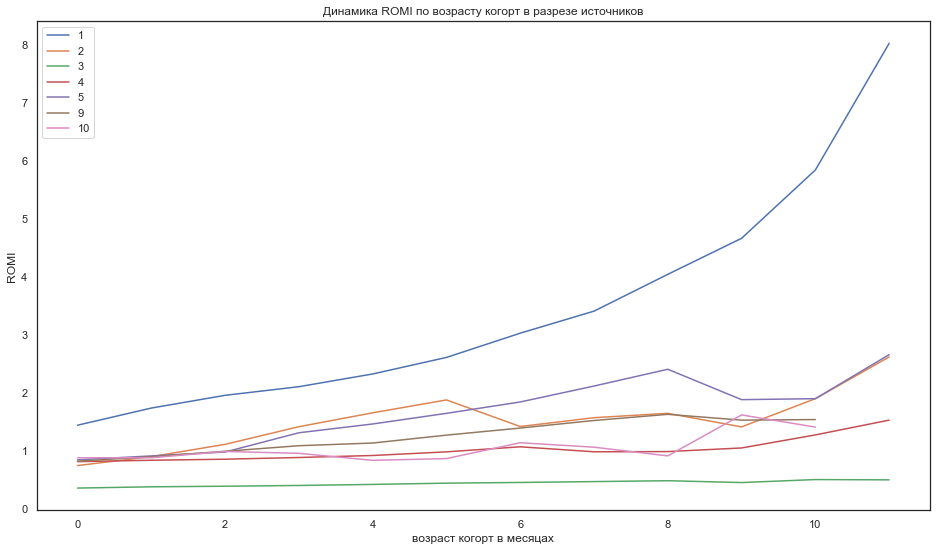

In [65]:
#строим график динамики усредненного ROMI по возрасту когорты
fig, ax= plt.subplots(1,1,figsize=(16, 9))
x= df_ROMI['age']
y1 = df_ROMI['1st']
y2 = df_ROMI['2d']
y3 = df_ROMI['3d']
y4 = df_ROMI['4th']
y5 = df_ROMI['5th']
y6 = df_ROMI['9th']
y7 = df_ROMI['10th']
ax.plot(x, y1, label = '1')
ax.plot(x, y2, label = '2')
ax.plot(x, y3, label = '3')
ax.plot(x, y4, label = '4')
ax.plot(x, y5, label = '5')
ax.plot(x, y6, label = '9')
ax.plot(x, y7, label = '10')
ax.legend(loc='upper left')
ax.set_title('Динамика ROMI по возрасту когорт в разрезе источников')
ax.set_xlabel('возраст когорт в месяцах')
ax.set_ylabel('ROMI')
plt.show()

#### Комментарий
Анализ ROMI по когортам подтвердил данные по проекту в целом, источники №1, №4 и №10 не выходят на окупаемость, а источник №1 является самым эффективным.

### Вывод
1. Самый затратный источник трафика №3, он же самый неэффективный - затраты не окупаются. Кроме него источники 4-10 в целом не окупаются.
2. Самый эффективныйй источник трафика №1 
3. Маркетинговые расходы в сумме растут в осенне-зимний период и снижаются с начала весны. 
4. В разрезе источников у всех источников кроме 9-10 сезонность совпадает с п.2, но у источника №4 в ноябре есть резкий спад, сменяющийся ростом в декабре
5. В разрезе усредненных когорт по источникам трафика, большинство когорт выходит на окупаемость на 2-3 месяце жизни. Усредненная когорта из источника №3 не выходит на окупаемость вообще. Когорта из источника №4 стабильно окупается с 9 месяца, также как и из источника № 10.

## Общий вывод

### Резюме по подготовке данных

В ходе подготовки данных были изменены типы данных для столбцов с датами. Дубликаты и пропуски не обнаружены.

### Результаты исследования

**Анализ продуктовых метрик:** 
- были выявлены всплески (2017-11-24, 2018-05-31)  и падения (2018-05-31) дневной пользовательской активности. 
- по месяцам активности наблюдался в ноябре 2017, меньше всего пользователей было в августе 2017
- частота сессий на пользователя в день около 1
- ASL = 60 секунд, может быть мало --> возможно, есть сложности в пользовании сервисом
- Retention rate падает после первого месяца. Вероятно, это связано со спецификой сервиса.
- можно выделить когорту 2017-06-01 в ней максимально долгое время поддерживается относительно высокая retention rate

**Анализ метрик электронной коммерции:**
- Большинство пользователей совершают покупки в день визита.
- Средний чек составляет около 5 у.е. 
- Пик среднего чека пришелся на декабрь и сменился спадом в январе, вероятно, есть сезонность в праздники - как вариант праздничные покупка билетов на праздничные мероприятия в январские каникулы
- На одного уникального клиента в месяц приходится около 1 покупки (1,22 в мес), в декабре наблюдался рост среднего показателя до 1,25 и также был пик по среднему чеку - около 6 у.е. - вероятно, ажиотаж перед праздниками
- С точки зрения LTV, когорта 2017-09-01 продемонстрировала наибольшие значения (рекомендация)

**Анализ маркетинговых метрик:**
- Самый затратный источник трафика - №3 - более 40% расходов
- Источники трафика в целом 3,4,10 показывают низкую эффективность по ROMI в рассматриваемый период, а самый эффективный источник трафика №1. Это подтверждается также анализом усредненных когорт клиентов, пришедших с данных источников.
- Маркетинговые расходы в общем имеют сезонность - рост в осенне-зимний период и снижение с начала весны.
- Есть исключения у источников относительно стабильная динамика по году 9-10 ,  у источника №4 в ноябре есть резкий спад, сменяющийся ростом в декабре

### Рекомендации

1. Отказаться от расходов на источники трафика с низкой ROMI: 3,4,10 и перераспределить бюджет на более эффективные источники 1,2,5
1. Запросить у продакт менеджера или техподдержки информацию о возможных причинах всплесков и спадов дневной пользовательской активности
2. Исследовать клиентов, которые не совершают покупку в день визита, есть ли закономерности в их поведении?
3. Обратить внимание на best practice когорты с самым высоким LTV 2017-09-01